<a href="https://colab.research.google.com/github/RohanCheera/Sentiment-Analysis/blob/main/App_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/linkedin-reviews.csv")

In [ ]:
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


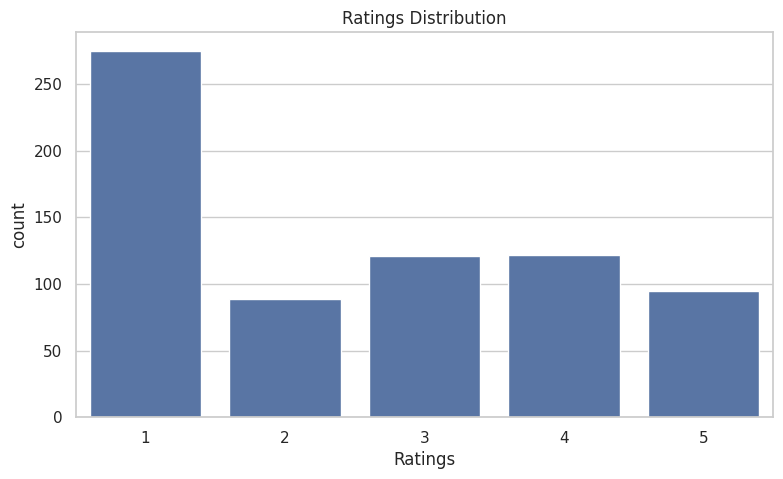

In [ ]:
#ploting the ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=data,x='Rating')
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("count")
plt.show()

In [ ]:
#pip install TextBlob

In [ ]:
data['text length']=[len(text) for text in data['Review']]
data.head()

,Review,Rating,text length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23
2,Slow and it tries to upload your contacts with...,1,61
3,Add ability to customize the profile and move ...,4,90
4,"Good app, but it's a pain that it's not possib...",4,133


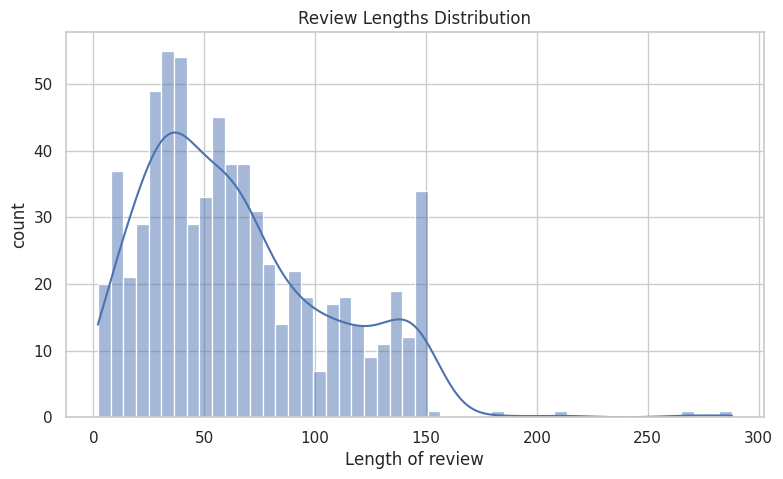

In [ ]:
#ploting the ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.histplot(data=data['text length'],bins=50,kde=True)
plt.title("Review Lengths Distribution")
plt.xlabel("Length of review")
plt.ylabel("count")
plt.show()

In [ ]:
from textblob import TextBlob

def assign_sentiment(review):
  sentiment=TextBlob(review).sentiment
  if sentiment.polarity>0.1:
    return "positive"
  elif sentiment.polarity<-0.1:
    return "Negative"
  else: return "Nutral"
data["sentiment"]=data['Review'].apply(assign_sentiment)
data.head()

,Review,Rating,text length,sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Nutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Nutral
4,"Good app, but it's a pain that it's not possib...",4,133,positive


In [ ]:
sentiment_distribution=data['sentiment'].value_counts().reset_index()
sentiment_distribution

,index,sentiment
0,positive,298
1,Nutral,297
2,Negative,107


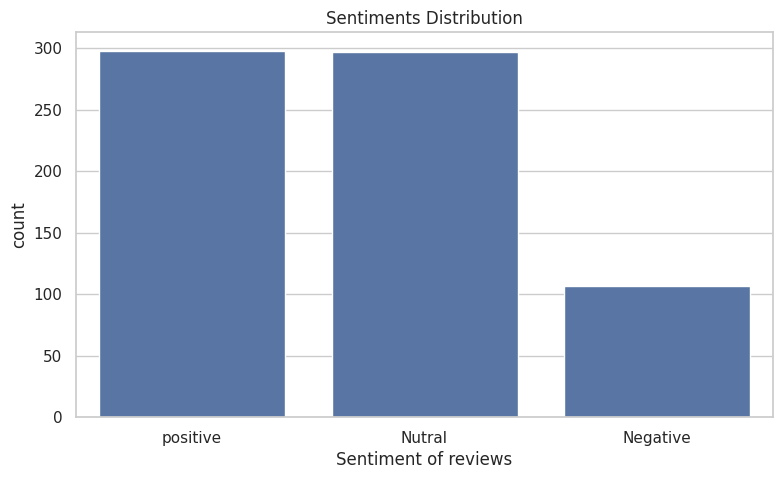

In [ ]:
#ploting the ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution['index'],y=sentiment_distribution['sentiment'])
plt.title("Sentiments Distribution")
plt.xlabel("Sentiment of reviews")
plt.ylabel("count")
plt.show()

In [ ]:
sentiments=data.sentiment.unique()
sentiments=np.array(sentiments)
sentiments

array(['Negative', 'Nutral', 'positive'], dtype=object)

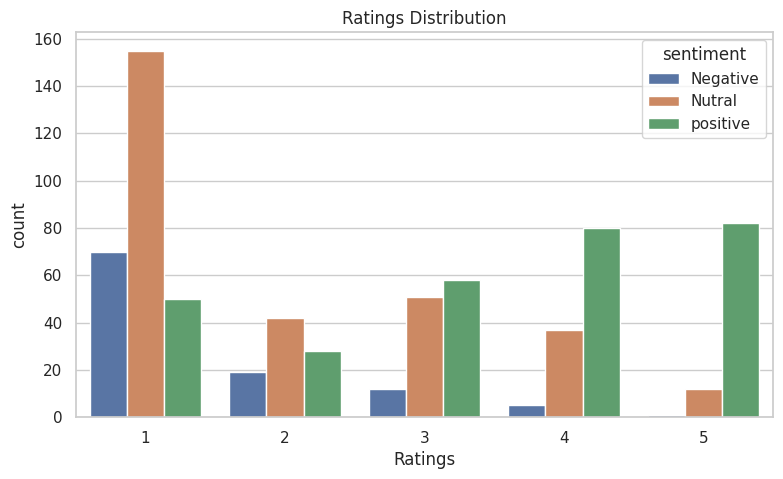

In [ ]:
#ploting the ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=data,x='Rating',hue='sentiment')
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("count")
plt.show()

In [ ]:
from wordcloud import WordCloud


In [ ]:
def generate_word_cloud(sentiment):
  text=''.join(review for review in data[data.sentiment==sentiment]['Review'])
  wordcloud=WordCloud(height=400,width=800,background_color='white').generate(text)
  plt.figure(figsize=(8,6))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.title(f"word cloud for {sentiment} reviews.")
  plt.axis("off")
  plt.show()

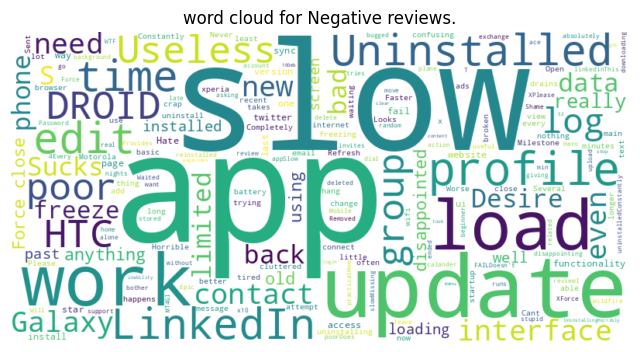

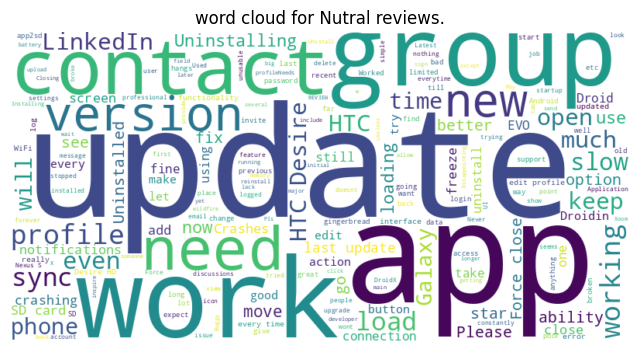

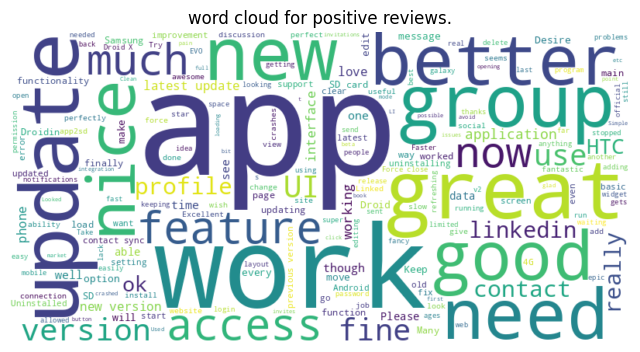

In [ ]:
for sentiment in sentiments:
  generate_word_cloud(sentiment)